# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [66]:
import pandas as pd

In [67]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [68]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [69]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [70]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [71]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [72]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [73]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [74]:
df.head()

,도착 시군구 코드,자치구,남자,여자,합계,요식업 종사자 수,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,종로구,71890,78563,150453,12920,357,105,4500874,4348356,123.298104,119.119987,59.819645,44.694476,26504649,19803049.50
1,11020,중구,63495,68298,131793,13059,174,102,3138112,3050645,113.699710,110.530616,58.197800,47.183639,26065980,21132891.17
2,11030,용산구,109826,117280,227106,7579,326,69,3495720,3422432,119.962938,117.447907,57.995736,36.418986,23776976,14930983.13
3,11040,성동구,137620,147146,284766,6810,433,58,2371151,2331836,90.495039,88.994581,58.184820,41.879404,24144722,17378528.65
4,11050,광진구,167562,183618,351180,8003,280,43,2365355,2382437,107.491706,108.267985,60.890991,45.669953,23556776,17668243.56


In [75]:
df.rename(columns={'합계': '인구'}, inplace=True)
df["승하차총승객수"] = df["승차총승객수"] + df["하차총승객수"]
df

,도착 시군구 코드,자치구,남자,여자,인구,요식업 종사자 수,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,승하차총승객수
0,11010,종로구,71890,78563,150453,12920,357,105,4500874,4348356,123.298104,119.119987,59.819645,44.694476,26504649,19803049.50,8849230
1,11020,중구,63495,68298,131793,13059,174,102,3138112,3050645,113.699710,110.530616,58.197800,47.183639,26065980,21132891.17,6188757
2,11030,용산구,109826,117280,227106,7579,326,69,3495720,3422432,119.962938,117.447907,57.995736,36.418986,23776976,14930983.13,6918152
3,11040,성동구,137620,147146,284766,6810,433,58,2371151,2331836,90.495039,88.994581,58.184820,41.879404,24144722,17378528.65,4702987
4,11050,광진구,167562,183618,351180,8003,280,43,2365355,2382437,107.491706,108.267985,60.890991,45.669953,23556776,17668243.56,4747792
5,11060,동대문구,174120,185753,359873,7629,308,74,4530373,4426822,127.573018,124.657074,59.944131,40.631885,24882389,16866011.11,8957195
6,11070,중랑구,189462,198008,387470,6020,428,51,3200879,3155827,79.082866,77.969784,63.727215,41.653042,21685479,14173946.94,6356706
7,11080,성북구,208682,229486,438168,6570,599,98,5051648,5060251,112.288788,112.480017,59.871429,44.970384,24434129,18352863.32,10111899
8,11090,강북구,141185,151792,292977,6209,410,71,3998077,3858057,126.465395,122.036345,65.100321,39.190099,20733085,12481223.62,7856134
9,11100,도봉구,149675,159819,309494,4266,368,55,2771076,2695540,101.649829,98.878985,66.744401,38.268616,19132149,10969622.19,5466616


---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

*정해진게 없나요? - 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
*가설마다 라벨데이터가 달라도 상관없나요? 네 상관없습니다.
*가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다(최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1
  - 인구수와 정류장 수에는 양의 상관관계가 있다.

* 가설 2
    - 승하차 총 승객수와 정류장 수에는 양의 상관관계가 있다.

* 가설 3
    - 특정 업종이 밀집된 지역은 교통 수요(총 이동 인구)가 높을 것이다.

## 2.단변량 분석

+ 변수의 비즈니스 의미  
    - 구별 요식업 종사자
    - 구별 이동 인원

+ 숫자? 범주?  
    - 

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [76]:
def eda_1_n(data, var, bins = 30) :
    # 기초 통계량
    display(data[[var]].describe().T)

    # 시각화
    plt.figure(figsize = (12,8))
    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()

In [77]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

### 1)


,count,mean,std,min,25%,50%,75%,max
인구,25.0,385551.96,125752.15437,131793.0,309494.0,389714.0,463318.0,660025.0


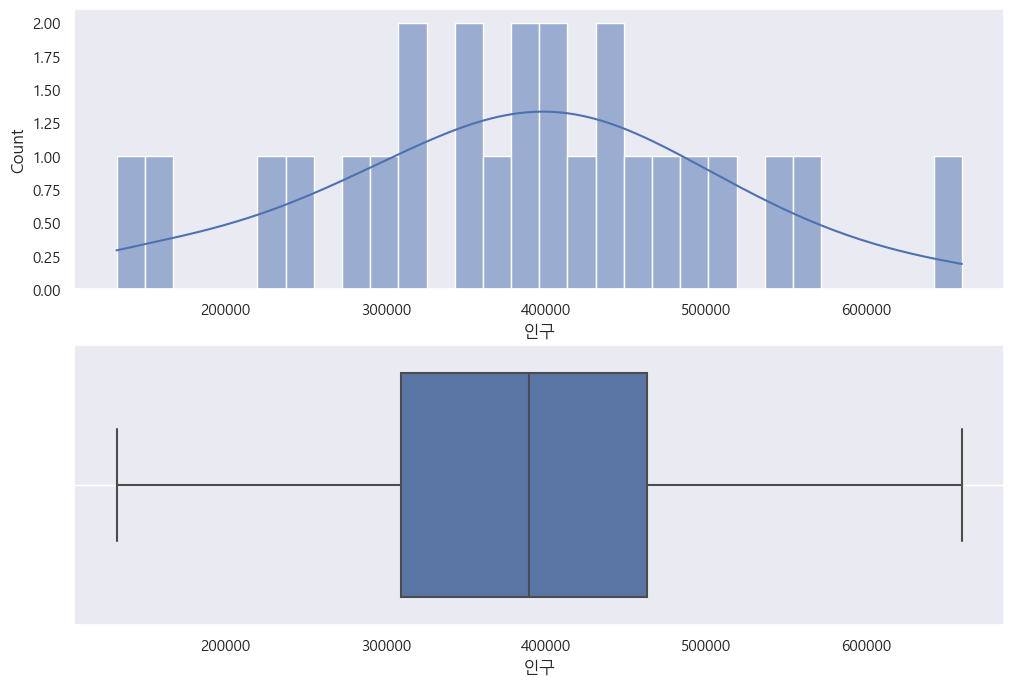

In [78]:
# eda_1_n(df,'인구')
# 기초 통계량
display(df[['인구']].describe().T)

# 시각화
plt.figure(figsize = (12,8))
plt.subplot(2,1,1)
sns.histplot(df['인구'], bins = 30, kde = True)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x = df['인구'])
plt.grid()
plt.show()

,count,mean,std,min,25%,50%,75%,max
정류장수,25.0,429.56,104.657409,174.0,357.0,441.0,496.0,601.0


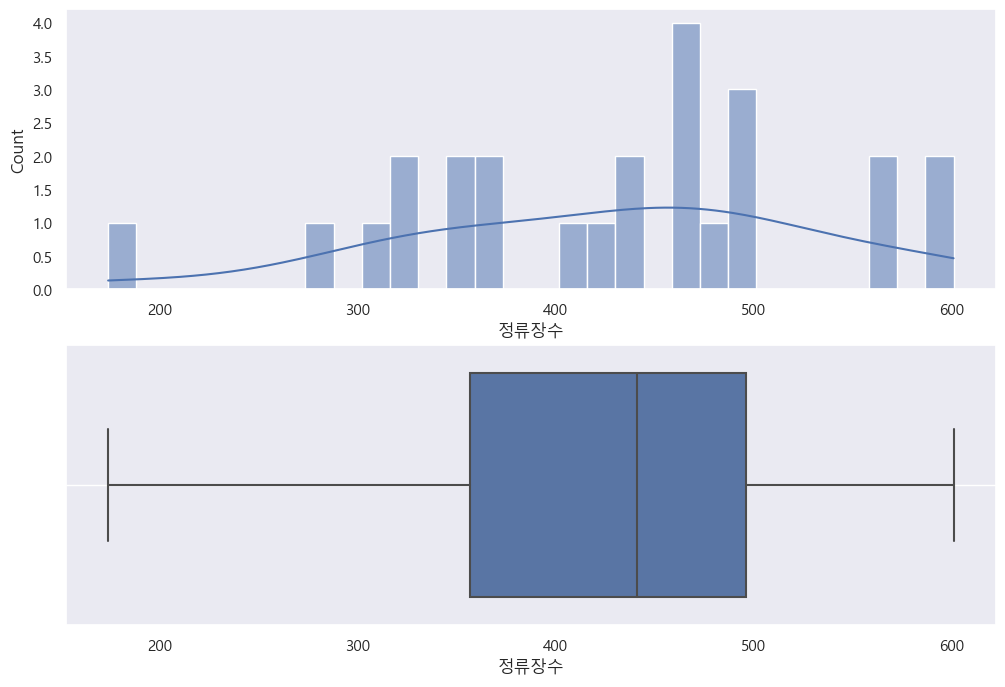

In [79]:
eda_1_n(df,'정류장수')

### 2)

,count,mean,std,min,25%,50%,75%,max
승하차총승객수,25.0,8140870.84,2.295669e+06,4702987.0,6356706.0,8104608.0,9491389.0,13557423.0


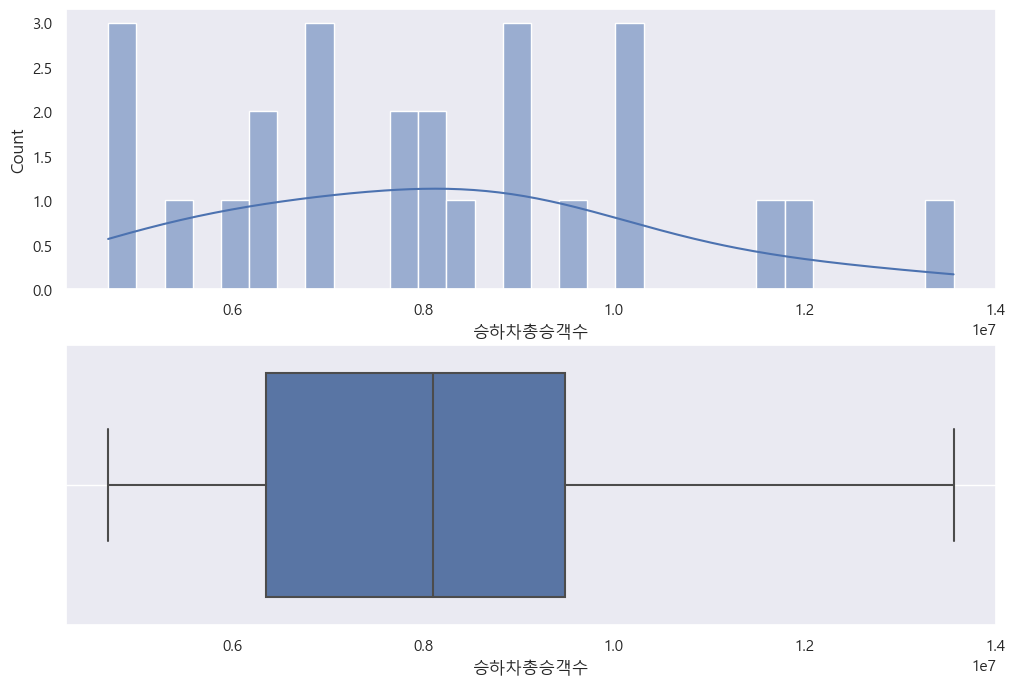

In [80]:
eda_1_n(df,'승하차총승객수')

,count,mean,std,min,25%,50%,75%,max
정류장수,25.0,429.56,104.657409,174.0,357.0,441.0,496.0,601.0


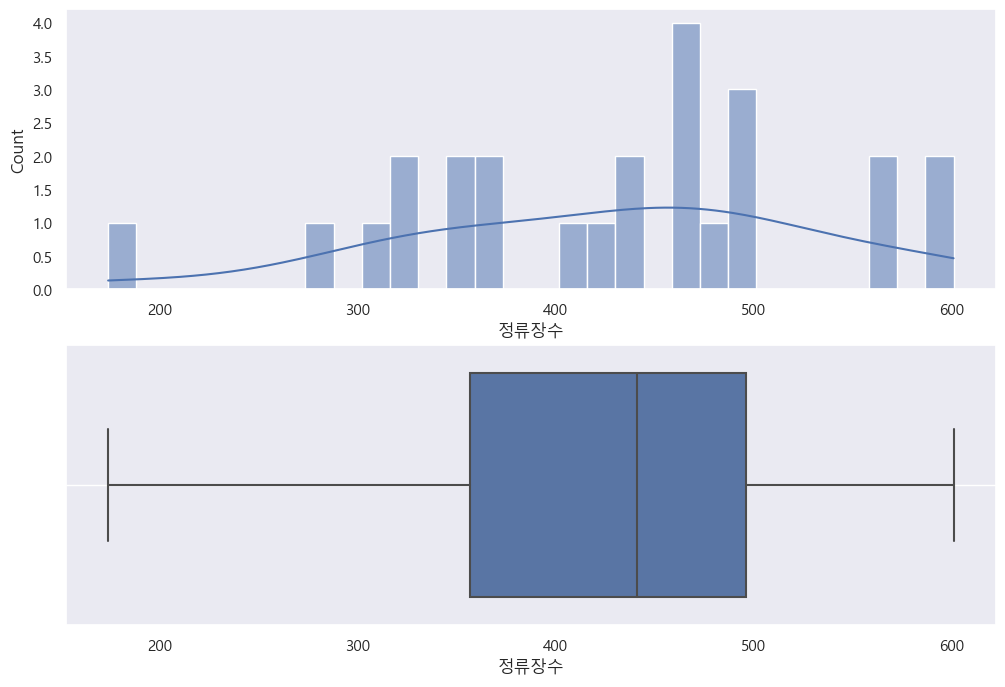

In [81]:
eda_1_n(df,'정류장수')

### 3)

,count,mean,std,min,25%,50%,75%,max
요식업 종사자 수,25.0,9341.16,4729.632083,4266.0,6232.0,7579.0,12920.0,26295.0


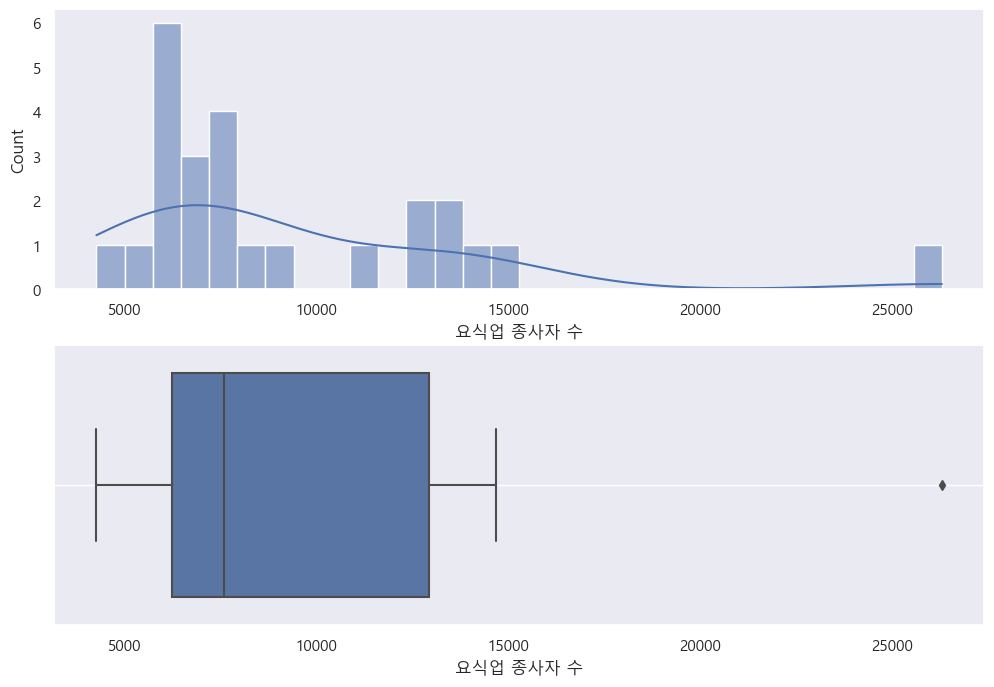

In [82]:
eda_1_n(df,'요식업 종사자 수')

,count,mean,std,min,25%,50%,75%,max
총 이동인구,25.0,2.021983e+07,8.420304e+06,8554931.56,15713269.19,17668243.56,22435647.77,48478887.79


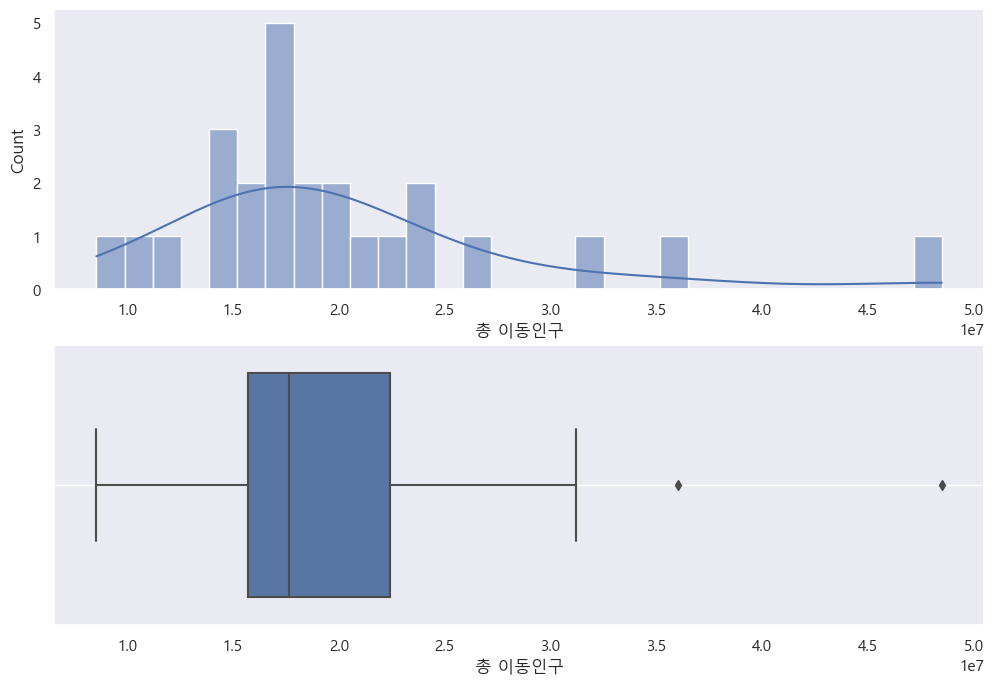

In [83]:
eda_1_n(df,'총 이동인구')

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

p-value 기준을 0.05로 가져죠? 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


In [84]:
def displayScatter(data, x, y):
    plt.scatter(x, y, data = data)
    plt.grid()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

### 1)

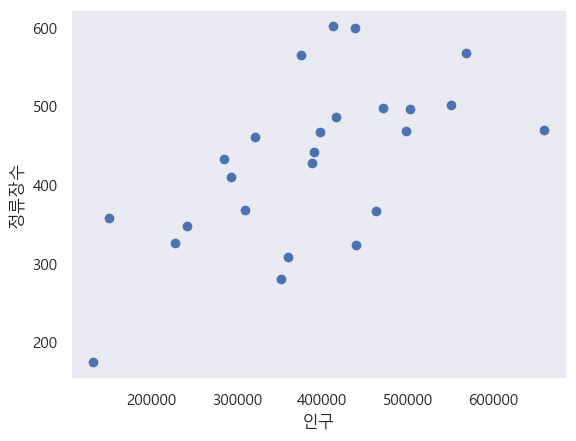

In [85]:
displayScatter(df, '인구', '정류장수')

### 2)

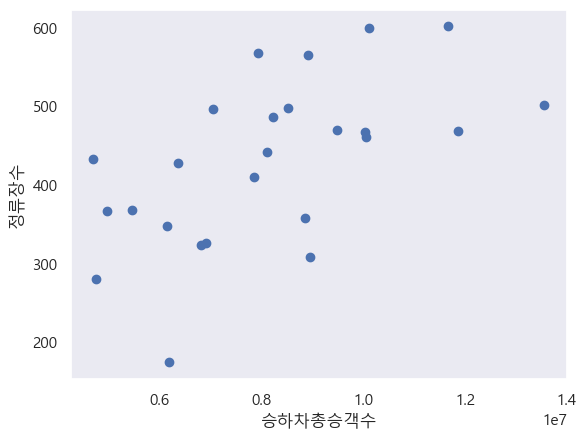

In [86]:
displayScatter(df, '승하차총승객수', '정류장수')

### 3)

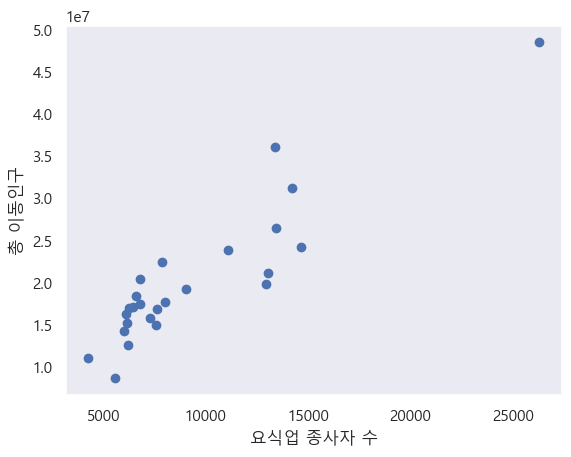

In [87]:
displayScatter(df,'요식업 종사자 수', '총 이동인구')

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [88]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

### 1)

In [89]:
spst.pearsonr(df['인구'],df['정류장수'])

(0.6087267652255124, 0.0012419633518247492)

### 2)

In [90]:
spst.pearsonr(df['승하차총승객수'],df['정류장수'])

(0.578322583811704, 0.0024600582323462757)

### 3)

In [91]:
spst.pearsonr(df['요식업 종사자 수'],df['총 이동인구'])

(0.9121382000934153, 2.2081256272225852e-10)

In [92]:
temp = df.drop(['도착 시군구 코드', '자치구'], axis=1)
temp.corr()

,남자,여자,인구,요식업 종사자 수,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,승하차총승객수
남자,1.000000,0.994260,0.998452,0.231941,0.591862,-0.249664,0.387857,0.406883,-0.305714,-0.261659,0.636290,0.684944,0.361452,0.523996,0.397605
여자,0.994260,1.000000,0.998672,0.258818,0.622666,-0.215974,0.401258,0.417669,-0.339653,-0.298949,0.625718,0.706438,0.400626,0.553416,0.409720
인구,0.998452,0.998672,1.000000,0.246247,0.608727,-0.232507,0.395381,0.413075,-0.323798,-0.281422,0.631708,0.697102,0.382337,0.540044,0.404474
요식업 종사자 수,0.231941,0.258818,0.246247,1.000000,0.229441,0.433022,0.629763,0.605700,0.232255,0.207285,0.056913,0.796764,0.872586,0.912138,0.618334
정류장수,0.591862,0.622666,0.608727,0.229441,1.000000,0.265475,0.573154,0.582647,-0.214180,-0.191566,0.282290,0.407116,0.367194,0.380868,0.578323
노선수,-0.249664,-0.215974,-0.232507,0.433022,0.265475,1.000000,0.689394,0.679600,0.470135,0.454210,-0.549493,0.060918,0.416403,0.278425,0.685090
승차총승객수,0.387857,0.401258,0.395381,0.629763,0.573154,0.689394,1.000000,0.996791,0.465166,0.468562,-0.005240,0.536625,0.627783,0.637402,0.999212
하차총승객수,0.406883,0.417669,0.413075,0.605700,0.582647,0.679600,0.996791,1.000000,0.461089,0.475652,-0.004204,0.527582,0.623235,0.623764,0.999183
승차평균승객수,-0.305714,-0.339653,-0.323798,0.232255,-0.214180,0.470135,0.465166,0.461089,1.000000,0.989754,-0.334850,-0.109224,0.087128,0.040136,0.463518
하차평균승객수,-0.261659,-0.298949,-0.281422,0.207285,-0.191566,0.454210,0.468562,0.475652,0.989754,1.000000,-0.335016,-0.108086,0.097697,0.035599,0.472455


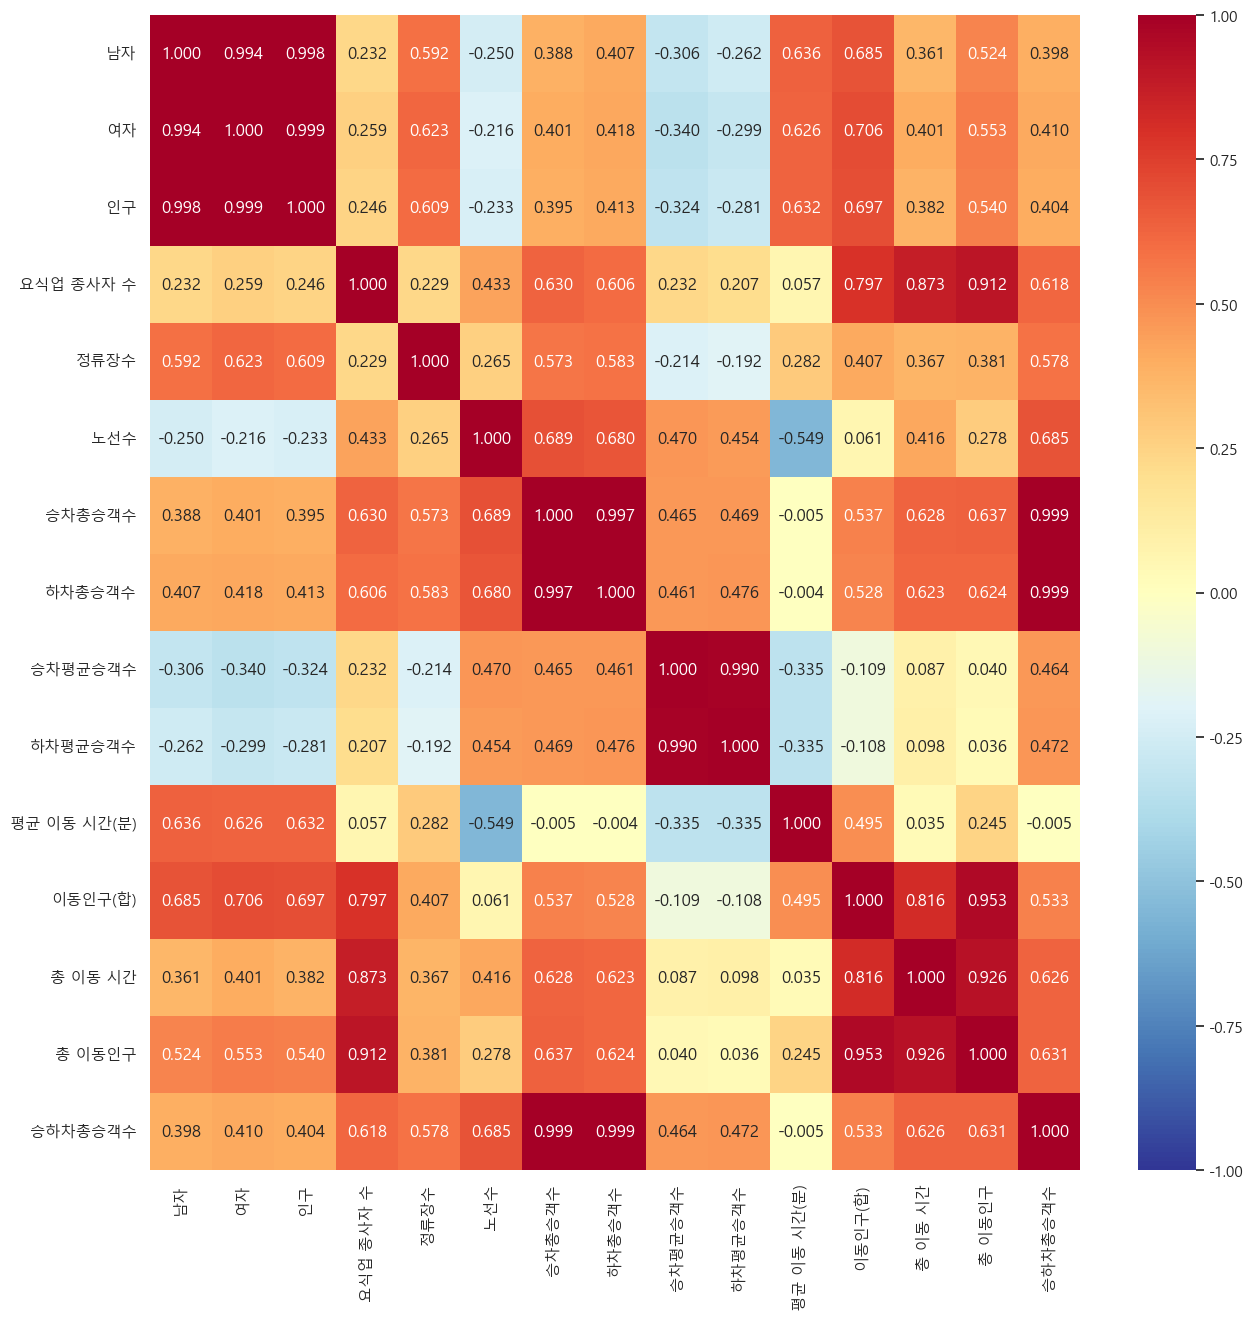

In [93]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
plt.figure(figsize = (15, 15))
sns.heatmap(temp.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

In [94]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. X. 인구수 -> Y. 정류장 수에는 중간 정도의 상관관계가 있다
# 2. X. 승하차 총 승객수(승차+하차 총승객수) -> Y. 정류장수에는 중간 정도의 상관관계가 있다
# 3. X. 요식업 종사자 수 -> Y. 총 이동인구는 밀접한 상관관계가 있다.

In [97]:
df["정류장수/총승객"] = df["정류장수"] / df["승하차총승객수"]
df["정류장수/인구수"] = df["정류장수"] / df["인구"]
df["정류장수/총승객-정류장수/인구수"] = df["정류장수/총승객"] - df["정류장수/인구수"]

df['총이동인구/요식업종사자수'] = df['총 이동인구'] / df['요식업 종사자 수']
df

,도착 시군구 코드,자치구,남자,여자,인구,요식업 종사자 수,정류장수,노선수,승차총승객수,하차총승객수,...,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,승하차총승객수,정류장수/총승객,정류장수/인구수,정류장수/총승객-정류장수/인구수,총이동인구/요식업종사자수
0,11010,종로구,71890,78563,150453,12920,357,105,4500874,4348356,...,119.119987,59.819645,44.694476,26504649,19803049.50,8849230,0.000040,0.002373,-0.002332,1532.743769
1,11020,중구,63495,68298,131793,13059,174,102,3138112,3050645,...,110.530616,58.197800,47.183639,26065980,21132891.17,6188757,0.000028,0.001320,-0.001292,1618.262591
2,11030,용산구,109826,117280,227106,7579,326,69,3495720,3422432,...,117.447907,57.995736,36.418986,23776976,14930983.13,6918152,0.000047,0.001435,-0.001388,1970.046593
3,11040,성동구,137620,147146,284766,6810,433,58,2371151,2331836,...,88.994581,58.184820,41.879404,24144722,17378528.65,4702987,0.000092,0.001521,-0.001428,2551.913164
4,11050,광진구,167562,183618,351180,8003,280,43,2365355,2382437,...,108.267985,60.890991,45.669953,23556776,17668243.56,4747792,0.000059,0.000797,-0.000738,2207.702557
5,11060,동대문구,174120,185753,359873,7629,308,74,4530373,4426822,...,124.657074,59.944131,40.631885,24882389,16866011.11,8957195,0.000034,0.000856,-0.000821,2210.776132
6,11070,중랑구,189462,198008,387470,6020,428,51,3200879,3155827,...,77.969784,63.727215,41.653042,21685479,14173946.94,6356706,0.000067,0.001105,-0.001037,2354.476236
7,11080,성북구,208682,229486,438168,6570,599,98,5051648,5060251,...,112.480017,59.871429,44.970384,24434129,18352863.32,10111899,0.000059,0.001367,-0.001308,2793.434295
8,11090,강북구,141185,151792,292977,6209,410,71,3998077,3858057,...,122.036345,65.100321,39.190099,20733085,12481223.62,7856134,0.000052,0.001399,-0.001347,2010.182577
9,11100,도봉구,149675,159819,309494,4266,368,55,2771076,2695540,...,98.878985,66.744401,38.268616,19132149,10969622.19,5466616,0.000067,0.001189,-0.001122,2571.406983


## 4.관계 정리

### 1) 강한 관계의 변수

- 요식업 종사자 수 / 총 이동인구
- 인구 / 이동인구
- 승하차 총 승객수 / 정류장수
- 평균 이동시간(분) / 노선수

### 2) 약한 관계의 변수

- 승하차총승객수 / 평균 이동 시간(분)
- 요식업 종사자 수  / 평균 이동 시간(분)

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇일까요?
### 조원들과 상의해서 각자의 인사이트를 도출하고 발표자료를 만들어보세요.

1. 두개의 관계를 도출한것을 종합하여 구별 인구와 정류장수의 상관계수(가설1)가 구별 승하차 인구와 정류장수의 상관계수(가설2)보다 높다.(하지만 차이는 미미하다..)
이 수치는 현재 승하차 인원보다는 구별 인구 기준으로 정류장이 설치되어있을 가능성을 제시하고 있다.
인구보다는 실제 승하차 인원 기준으로 정류장을 세워야 한다.
"정류장수/총승객-정류장수/인구수"열을 통해 교통 실수요를 측정하고 실수요 대비 정류장이 부족한 구를 우선 추천한다
정류장수/총승객수-정류장수/인구수 가 가장 작은 종로구, 마포구 성동구에 신규 정류장 추천

2. 가설 3는 '총이동인구/요식업종사자수'를 통해 요식업 종사자 수보다 이동하는 인구의 비율이 다른 곳보다 많다면 비교적 붐빈다는 것을 알 수 있고 큰 비율을 가지고 있는 '노원구', '강동구'에 신규 노선을 추천